# Frequency Analytics
**Does this data tell us anything through frequency analysis?**

### Install Prerequisites
Then load modules needed

In [1]:
! pip install pandas numpy scipy matplotlib 
# Preliminary setup
import pandas as pd
import numpy as np
import scipy.signal as ssig
import matplotlib.pyplot as plt

### Load data
If missing, these data files are created by other notebooks

In [2]:
# Import dataset
df = pd.read_pickle("data/cleaned.pickle")

## Trend analysis
Sub2 is the laundry room, it's most likely to exhibit patterned usage

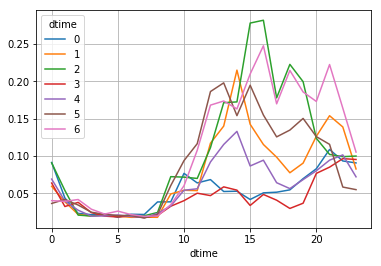

In [10]:
# Plot a trace of hourly average power for each DOW
g = df.sub2.groupby([df.index.hour, df.index.dayofweek])
_ = g.mean().unstack().plot(grid=True)

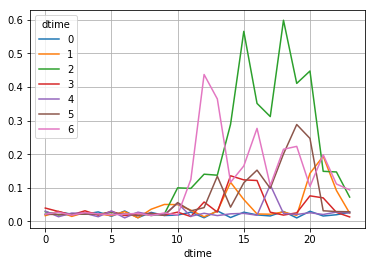

In [9]:
# Plot a trace of hourly average power for each DOW during the winter months of 2009
dw = df[ df.index.month.isin([9,10,11]) & df.index.year.isin([2009]) ]
g = dw.sub2.groupby([dw.index.hour, dw.index.dayofweek])
_ = g.mean().unstack().plot(grid=True)

## Power Spectral Analysis
Examine the power usage in the laundry room using peridograms

In [11]:
(pf, pPxx) = ssig.periodogram(df.sub2, fs=1/60)
(wf, wPxx) = ssig.periodogram(dw.sub2, fs=1/60)

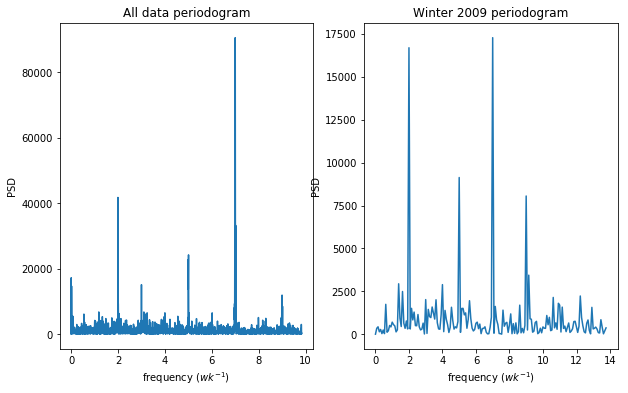

In [12]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,6))

fbins = 2000
freqmult = 3600*24*7
ax1.plot(pf[0:fbins]*freqmult, pPxx[0:fbins])
ax1.set_xlabel('frequency ($wk^{-1}$)')
ax1.set_ylabel('PSD')
ax1.set_title('All data periodogram')


wbins=180
ax2.plot(wf[0:wbins]*freqmult, wPxx[0:wbins])
ax2.set_xlabel('frequency ($wk^{-1}$)')
ax2.set_ylabel('PSD')
_ = ax2.set_title('Winter 2009 periodogram')

## Interpretation
The large spike at daily frequency suggests that laundry tends to happen at around the same time every day.    The spikes at 2x and 5x per week suggests that at least some of the data demonstrates a biweekly tendency, and that some set of 5 days is generally more popular than the other two.

The shorter window on winter of 2009 shows a much more exaggerated spike at 2x per week, adding weight to the hypothesis that Wednesday and Sunday were likely to be laundry day during that period.  A smaller peak at 5x per week suggests that there are two unpopular days.  The smallest distinct peak at 9x per week suggests a patterened time of day variation.